In [1]:
import numpy as np
from astropy.modeling.models import Gaussian2D
y, x = np.mgrid[0:500, 0:500]
data = Gaussian2D(1, 50, 100, 10, 5, theta=0.5)(x, y)

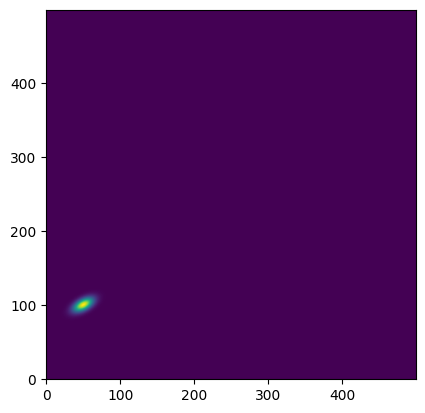

In [2]:
import matplotlib.pyplot as plt
plt.imshow(data, origin='lower')

In [3]:
from astropy.nddata import Cutout2D
from astropy import units as u
position = (49.7, 100.1)
size = (41, 51)     # pixels
cutout = Cutout2D(data, position, size)

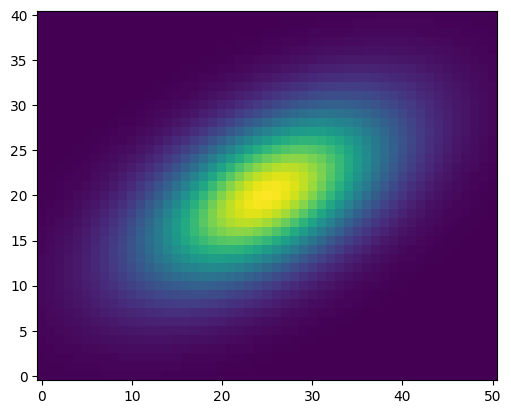

In [4]:
cutout = Cutout2D(data, position, (41, 51))
plt.imshow(cutout.data, origin='lower')

In [9]:
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.wcs import WCS

#url = 'https://astropy.stsci.edu/data/photometry/spitzer_example_image.fits'
url = 'https://astroarchive.noirlab.edu/api/retrieve/a099661b099dc299aff828a753367ee8/'

position = (500, 300)
size = (400, 400)

In [10]:
filename = download_file(url)

In [11]:
filename

'/tmp/astropy-download-110416-1kf51g16'

In [12]:
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [14]:
hdu.header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2019-07-27T11:52:53' / Date FITS file was generated                  
IRAF-TLM= '2019-07-27T11:53:05' / Time of last modification                     
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT MODIFIED:DATE,DATE-OBS,DTACQNAM,DTCALDAT,DTINSTRU,DTNSANAM,DTPI,DTPROPID
COMMENT ,DTSITE,DTTELESC,INSTRUME,OBSERVAT,OBSID,OBSTYPE,ODATEOBS,PROCTYPE,PRODT
COMMENT YPE,PROPID,SIMPLE,TELESCOP,TIME-OBS                                     
OBJECT  = 'DECaLS_41380_r'  

In [15]:
fits.info(filename)

Filename: /tmp/astropy-download-110416-1kf51g16
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     187   ()      
  1  S29           1 CompImageHDU    108   (2046, 4094)   int32   
  2  S30           1 CompImageHDU    108   (2046, 4094)   int32   
  3  S31           1 CompImageHDU    108   (2046, 4094)   int32   
  4  S25           1 CompImageHDU    108   (2046, 4094)   int32   
  5  S26           1 CompImageHDU    108   (2046, 4094)   int32   
  6  S27           1 CompImageHDU    108   (2046, 4094)   int32   
  7  S28           1 CompImageHDU    108   (2046, 4094)   int32   
  8  S20           1 CompImageHDU    108   (2046, 4094)   int32   
  9  S21           1 CompImageHDU    108   (2046, 4094)   int32   
 10  S22           1 CompImageHDU    108   (2046, 4094)   int32   
 11  S23           1 CompImageHDU    108   (2046, 4094)   int32   
 12  S24           1 CompImageHDU    108   (2046, 4094)   int32   
 13  S14           1 CompImageHDU  

In [16]:
image_data = fits.getdata(filename, ext=1)

In [17]:
image_data.shape

(4094, 2046)